# Quantum Fourier transform and its applications: Part 1

*A good idea has a way of becoming simpler and solving problems other than that for which it was intended.*  
– Robert Tarjan

In [1]:
from qiskit import *
from qiskit.compiler import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plotter
import scipy
import numpy as np
from IPython.display import display, Math, Latex
import qiskit.quantum_info as qi
%matplotlib inline
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

You may heard about the **discrete Fourier transform (DFT)**. In the usual mathematical notation, the discrete Fourier transform takes as input a vector of complex numbers, $x_0,\ldots,x_{N-1}$ where the length $N$ of the vector is a ﬁxed parameter. It outputs the transformed data, a vector of complex numbers $y_0,\ldots,y_{N-1}$, deﬁned by
$$ y_k \equiv \frac{1}{\sqrt{N}} \sum^{N-1}_{j=0} x_j e^{\frac{2\pi i j k }{N}} $$ 

The **quantum Fourier transform** is exactly the same transformation, although the conventional notation for the quantum Fourier transform is somewhat different. The quantum Fourier transform on an orthonormal basis $|0\rangle,\ldots, |N-1\rangle$ is deﬁned to be a linear operator with the following action on the basis states,
$$|j\rangle \to \frac{1}{\sqrt{N}} \sum^{N-1}_{k=0}  e^{\frac{2\pi i j k}{N}} |k\rangle$$
Equivalently, the action on an arbitrary state may be written,
$$ \sum_{j=0}^{N-1} x_j |j\rangle \to \sum_{k=0}^{N-1} y_k |k\rangle $$
where the amplitudes $y_k$ are the discrete Fourier transform of the amplitudes $x_j$.
We will show later that this is indeed an unitary transformation.  

Now we will aim to derive the circuit for quantum Fourier transfom. But for that we can use the alternate representation of the transform. It is very helpful to write the state $|j\rangle$ using the binary representation $j = j_1 j_2 \ldots j_n$. More formally, $j = j_1 2^{n-1} + j_2 2^{n-2}+\ldots+j_n 2^0$. It is also convenient to adopt the notation $0 . j_l j_{l+1} \ldots j_m$ to represent the binary fraction $j_l/2 + j_{l+1}/4+ \ldots + j_m/2^{m-l+1}$.  using a little algebra the quantum Fourier transform can be given the following useful product representation: 
$$|j_1\ldots j_n\rangle \to \frac{(|0\rangle + e^{2\pi i 0.j_n}|1\rangle)(|0\rangle + e^{2\pi i 0.j_{n-1}j_n}|1\rangle) \ldots (|0\rangle + e^{2\pi i 0.j_1j_2 \ldots j_n}|1\rangle)}{2^{\frac{n}{2}}}$$
We won't go into the derivation of this form, though you can verify it for some terms. This product representation is so useful that you may even wish to consider this to be the deﬁnition of the quantum Fourier transform. The product representation makes it easy to derive an efﬁcient circuit for the quantum Fourier transform. Let us define an unitary transformation $R_k$ used in the circuit diagram figure:
$$R_ k  \equiv \left[ \begin{matrix} 1 & 0\\
0 &  e^{\frac{2 \pi i}{2^k}}
\end{matrix} \right]$$  

We can see the circuit diagram below for quantum fourier transform. we will apply the gates as shown to get the product representation mentioned above which implies the this is indeed a circuit for quantum fourier transform.
   <img src = "https://raw.githubusercontent.com/sachinpteli/personal/master/qft1.png" height = '1000'      width = '1200'> </img>

Do keep in mind that the swap gates at the end of the circuit which reverse the order of the qubits and normalization factors of $\frac{1}{\sqrt{2}}$ in the output are not shown in the figure to improve the readability.
   
So let's start to apply gates by following the figure.

Notice that applying the Hadamard gate to the ﬁrst bit produces the state:
$$\frac{1}{2^{\frac{1}{2}}}(|0\rangle + e^{2\pi i 0.j_1}|1\rangle)|j_2 \ldots  j_n\rangle$$
Applying the controlled-$R_2$ gate produces the state:
$$\frac{1}{2^{\frac{1}{2}}}(|0\rangle + e^{2\pi i 0.j_1j_2}|1\rangle)|j_2 \ldots j_n\rangle$$
We continue applying the controlled-$R_3, R_4$ through $R_n$ gates, each of which adds an extra bit to the phase of the co-efﬁcient of the ﬁrst $|1\rangle$. At the end of this procedure we have the state: 
$$\frac{1}{2^{\frac{1}{2}}}(|0\rangle + e^{2\pi i 0.j_1j_2 \cdots j_n}|1\rangle)|j_2 \ldots  j_n\rangle$$
Next, we perform a similar procedure on the second qubit and after applying Hadamard and controlled-$R_2$ through $R_{n-1}$ gates yield the state:
$$\frac{1}{2^{\frac{2}{2}}}(|0\rangle + e^{2\pi i 0.j_1j_2 \cdots j_n}|1\rangle)(|0\rangle + e^{2\pi i 0.j_2 \cdots j_n}|1\rangle)|j_3 \ldots  j_n\rangle$$
We continue in this fashion for each qubit, giving a ﬁnal state :
$$\frac{1}{2^{\frac{n}{2}}}(|0\rangle + e^{2\pi i 0.j_1j_2 \cdots j_n}|1\rangle)(|0\rangle + e^{2\pi i 0.j_2 \cdots j_n}|1\rangle) \cdots (|0\rangle + e^{2\pi i 0.j_n}|1\rangle)$$
Swap operations which are omitted from Figure for clarity, are then used to reverse the order of the qubits. After the swap operations, the state of the qubits is:
$$ \frac{1}{2^{\frac{n}{2}}}(|0\rangle + e^{2\pi i 0.j_n}|1\rangle)(|0\rangle + e^{2\pi i 0.j_{n-1}j_n}|1\rangle)\cdots (|0\rangle + e^{2\pi i 0.j_1j_2 \cdots j_n}|1\rangle)$$


Comparing with the earlier equation, we see that this is the desired output from the quantum Fourier transform. This construction also proves that the quantum Fourier transform is **unitary**, since each gate in the circuit is unitary.


So this is a quite long process. Hence we will use <code>qft_rotations</code> and <code>swap_registers</code> to make <code>qft</code>, for your use. Go through the code to understand how it works.
 

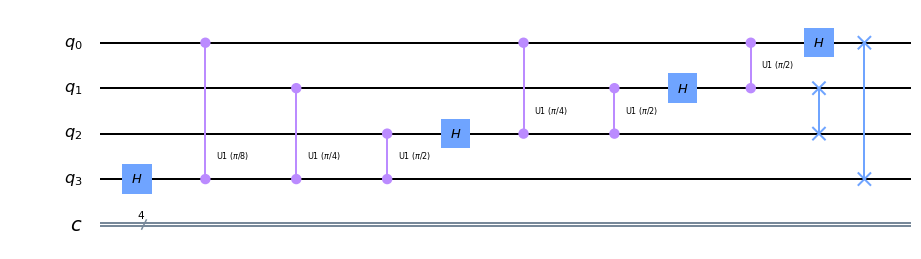

In [2]:

def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cu1(np.pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(4,4)
qft(qc,4)
qc.draw(output = 'mpl')

Inverse of the quantum Fourier transform $QFT^\dagger$ is perhaps more important than the $QFT$ in terms of its applications. We will see its use in very important problems which quantum computing solves exponentially faster than classical comupters.

{'0000': 10000}


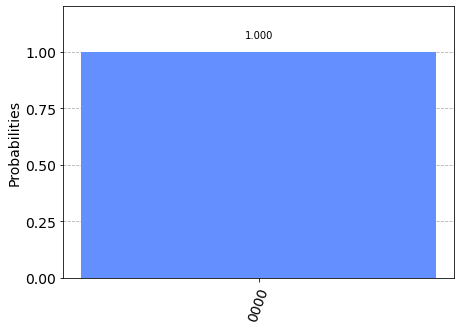

In [3]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

qc = inverse_qft(qc,4)

qc.measure(range(4),range(4))
def run_circuit(qc):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc, backend, shots = 10000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qc)
print(counts)
plot_histogram(counts)
# we should get the intial state '0000'

##  Your task

1) Given $QFT^n|x\rangle = |x\rangle$. Figure out $n$  by applying $QFT$ different number of times. Be careful and try for different initial values of qubits as sometimes a particular state may be the eigenstate for a lesser $n$ and thus misleading. Print $n$. 

{'110': 10000}


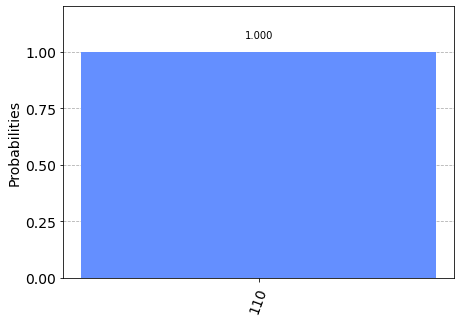

In [47]:
qc1 = QuantumCircuit(3,3)
qc1.x(1)
qc1.cx(1,2)

for i in range(4):# choose the number of times you want to do qft)
    qft(qc1,3)

qc1.measure(0,0)   
qc1.measure(1,1)
qc1.measure(2,2)
def run_circuit(qc1):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc1, backend, shots = 10000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qc1)
print(counts)
plot_histogram(counts)

2) Analyze the states and their amplitudes for different cases and find the untiary matrix associated with $QFT^2$. Try to use states whose amplitudes have a different modulus (unlike $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$), otherwise you may not see a change. Do this for 2 qubits i.e. print the $4\times4$ matrix as output.

In [51]:
qc2 = QuantumCircuit(2)
qft(qc2,2)

print(qi.Operator(qc2).data)

[[ 5.00000000e-01+0.j   5.00000000e-01+0.j   5.00000000e-01+0.j
   5.00000000e-01+0.j ]
 [ 5.00000000e-01+0.j   7.85046229e-17+0.5j -5.00000000e-01+0.j
  -7.85046229e-17-0.5j]
 [ 5.00000000e-01+0.j  -5.00000000e-01+0.j   5.00000000e-01+0.j
  -5.00000000e-01+0.j ]
 [ 5.00000000e-01+0.j  -7.85046229e-17-0.5j -5.00000000e-01+0.j
   7.85046229e-17+0.5j]]


## The intuition

The quantum Fourier transform (QFT) transforms between two bases, the computational ($Z$) basis, and the Fourier basis. The H-gate is the single-qubit QFT, and it transforms between the $Z$-basis states  $|0\rangle$  and  $|1\rangle$  to the X-basis states  $|+\rangle$  and  $|−\rangle$ . In the same way, all multi-qubit states in the computational basis have corresponding states in the Fourier basis. The QFT is simply the function that transforms between these bases.

$$|\text{State in Computational Basis}\rangle \quad\underrightarrow{QFT} \quad{}|\text{State in Fourier Basis}\rangle$$
 
$$QFT|x\rangle=|\tilde{x}\rangle$$
(We often note states in the Fourier basis using the tilde).

In the computational basis, we store numbers in binary using the states  $|0\rangle$  and  $|1\rangle$:

<img src='https://raw.githubusercontent.com/sachinpteli/personal/master/zbasis-counting.gif'> </img>

Note the frequency with which the different qubits change; the leftmost qubit flips with every increment in the number, the next with every $2$ increments, the third with every $4$ increments, and so on. In the Fourier basis, we store numbers using different rotations around the $Z$-axis:

<img src='https://raw.githubusercontent.com/sachinpteli/personal/master/fourierbasis-counting.gif'> </img>

The number we want to store dictates the angle at which each qubit is rotated around the $Z$-axis. In the state  $|\tilde{0}\rangle$ , all qubits are in the state  $|+\rangle$ . As seen in the example above, to encode the state  $|\tilde{5}\rangle$  on $3$ qubits, we rotated the leftmost qubit by  $\frac{5}{2^n}= \frac{5}{8}$  full turns ( $\frac{5}{8} × 2 \pi$  radians). The next qubit is turned double this ( $\frac{10}{8} × 2 \pi$  radians, or  $\frac{10}{8}$  full turns), this angle is then doubled for the qubit after, and so on.

Again, note the frequency with which each qubit changes. The leftmost qubit (qubit $0$) in this case has the lowest frequency, and the rightmost the highest.



## Your task

3) Create a circuit  in a function which adds $1$ to all the states from $|0000\rangle$ to $|1110\rangle$ and changes the state $|1111\rangle$ to $|0000\rangle$. Check the output for values $|1000\rangle$, $|1101\rangle$ and $|1111\rangle$. Unofortunately, no ancilla qubits allowed.  
Hint: Change the basis. Do the work. Change it back.

In [64]:
def Modulo_increment(qc):
    qft(qc,4)
    for i in range(4):
        qc.u1(np.pi/(2**(3-i)), i)
    inverse_qft(qc, 4)
    return qc

{'1001': 10000}


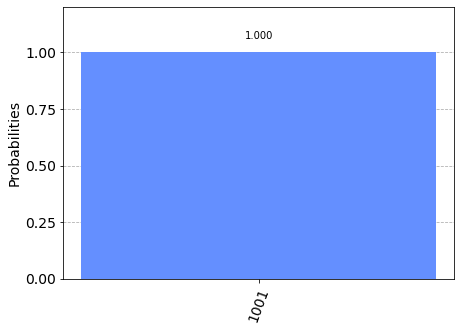

In [89]:
# checking for the case of '1000'
qc2 = QuantumCircuit(4,4)
qc2.x(3)
qc2 = Modulo_increment(qc2)
qc2.measure(range(4),range(4))
def run_circuit(qc2):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc2, backend, shots = 10000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qc2)
print(counts)
plot_histogram(counts)

{'1110': 10000}


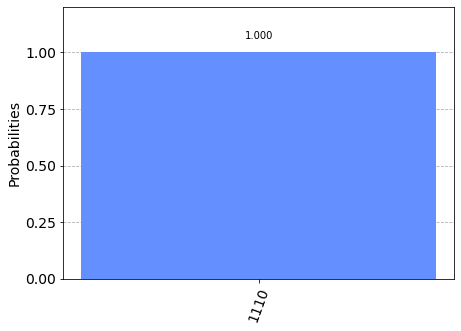

In [88]:
# checking for the case of '1101'
qc3 = QuantumCircuit(4,4)
qc3.x(3)
qc3.x(2)
qc3.x(0)
qc3 = Modulo_increment(qc3)
qc3.measure(range(4),range(4))
def run_circuit(qc3):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc3, backend, shots = 10000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qc3)
print(counts)
plot_histogram(counts)

{'0000': 10000}


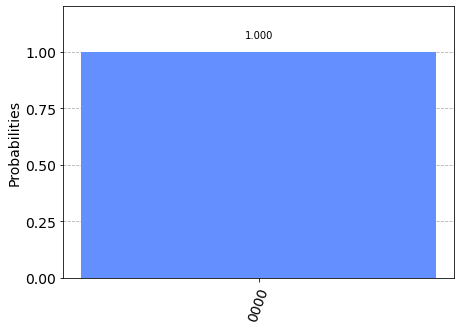

In [67]:
# checking for the case of '1111'
qc4 = QuantumCircuit(4,4)
qc4.x(range(4))
qc4 = Modulo_increment(qc4)
qc4.measure(range(4),range(4))
def run_circuit(qc4):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc4, backend, shots = 10000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qc4)
print(counts)
plot_histogram(counts)